## Importing RTXI H5 files into Python

This Python notebook uses functions from **load_h5.py** to load RTXI data and process it into an easy-to-handle Python format. The **load_h5** module includes features to find single potentials, and save them to .csv files located at: **./data/{rtxi_filename}/{ap_label}.csv**.

If you're interested in the implementation of the functions below, open **load_h5.py**. 

Let me know if you want to make changes/additions to **load_h5.py**, so we can setup a collaborative workflow using GitHub.

#### 1. Load Functions from load_h5.py

This Jupyter Notebook is in a directory that includes a file called **load_h5.py**. The **load_h5.py** file contains a few custom functions that I wrote to process the RTXI H5 file. Below, I use Python's `import` statement in the line `from load_h5 import *` to import all the functions from **load_h5.py**. 

In [1]:
from load_h5 import * #file developed by me plot_all_channels(recorded_data)

#### 2. Set the file name and trial number

In the current directory, there should be a folder called **/data**. If you have not done so already, copy your .h5 file into this folder. Once you've done that, change the `filename` variable in the code below to:
```
filename='data/YOUR_FILE_NAME.h5'
```

Set the `trial_number` variable to an integer that corresponds to your desired trial number. If you don't know your trial number, try a few out, starting from 1 and counting up. The code below will print the tags and plot voltage/current curves for the given trial. You can adjust the `trial_number` variable until you find the data you want.

         Time    Description
0   29.855626        IK1_sf1
1   67.863612  pacing_pt5_hz
2  166.199081    pacing_1_hz
3  254.558795  pacing_pt5_hz


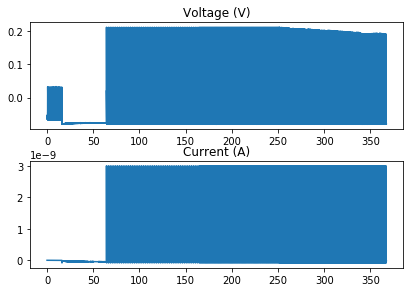

In [2]:
#Set the path and trial
filename='data/attempt_2_071519.h5'
trial_number=3
f=load_h5(filename)

recorded_data=get_exp_as_df(f,trial_number)
tags=get_tags(f,trial_number)

print(tags)
plot_V_and_I(recorded_data)

#### 3. Search for a single action potential

The code below opens a figure with Voltage and current plots. Use the magnifying glass to zoom in on the data. Once your zoomed in, you can eyeball the start and end times of an action potential. Use these times for extraction single action potential data, in the next step.

<IPython.core.display.Javascript object>


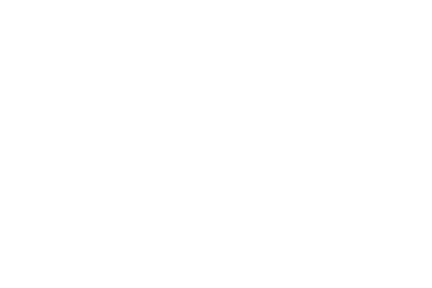

<IPython.core.display.Javascript object>


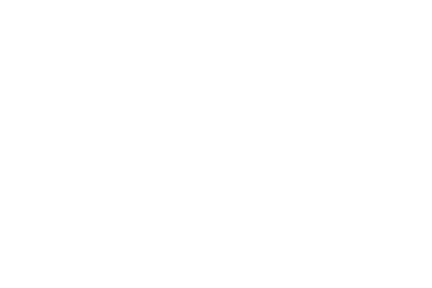

In [53]:
%matplotlib notebook
plot_V_and_I(recorded_data)

#### 4. Plot the single action potential

Set `subsample_start` and `subsample_end` to the start and end times of your single action potential. The code will use these times to extract the single action potential data, save it to a variable called`single_ap`, and plot it.

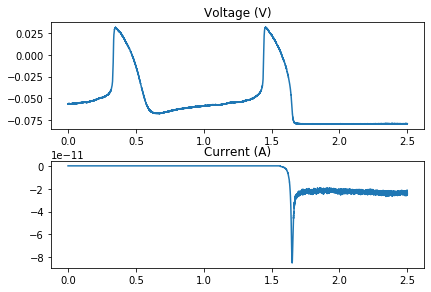

In [46]:
subsample_start=14.5
subsample_end=17
single_ap=subsample_data(recorded_data,subsample_start,subsample_end)

%matplotlib inline
plot_V_and_I(single_ap)

#### 5. Save the action potential

The code below will save the current action potential to a file with the following path:

```
./data/{RTXI_FILENAME}/sap_{NUMBER}_qq_{LABEL}.csv
```

The bracketed, all-caps words in this path may vary. So what do they mean:
- `{RTXI_FILENAME}` &mdash; automatically extracted from the original `filename` variable.
- `{NUMBER}` &mdash; automatically set based on the number of action potentials that have been saved for the given dataset. The first action potential is set to 1.
- `{LABEL}` &mdash; This is manually set by changing the `label` variable. You do not need to set `{LABEL}`. By default it is left blank. It's purpose is so the user can create some reminder for themselves.

In [6]:
label=''
is_returned=False
save_SAP_to_csv(filename,single_ap,is_returned,label)

Saved to data/attempt_2_07151/sap_1_qq_.csv


#### 6. Plot all action potentials

The `plot_all_aps()` function below will plot all APs that are saved to the `./data/{RTXI_FILENAME}/` folder.

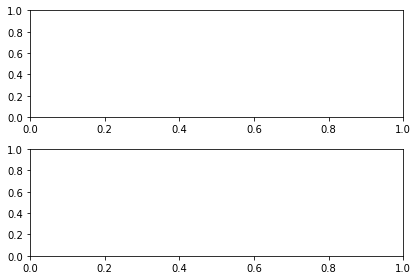

In [15]:
plot_all_aps(filename)

#### 7. Delete saved action potentials

If you want to delete the action potentials that you saved, navigate to `./data/{RTXI_FILENAME}/` and select the files you would like to delete.

Action Potential Duration is 0.2511


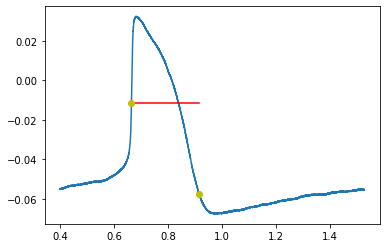

In [9]:
apd = get_ap_duration(get_single_ap(recorded_data, 1), .9, True)

[16, 154, 84, 258, 194]


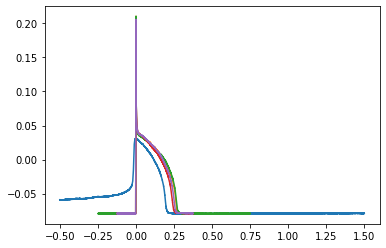

In [50]:
import random

def get_cycle_lengths(ap_data):
    voltage = ap_data['Voltage (V)']
    voltage_local_max = np.ndarray.tolist(list(signal.find_peaks(voltage, distance=5000, prominence=.03, height=0))[0])
    cycle_lengths = []
    for x in range(len(voltage_local_max)-1):
        cycle_start = voltage_local_max[x]
        cycle_end = voltage_local_max[x+1]
        single_ap_max = ap_data[cycle_start:cycle_end]
        cycle_time = single_ap_max['Time (s)']
        cycle_lengths.append(len(cycle_time))

    return cycle_lengths

def get_various_aps(ap_data, does_plot=False):
    cycle_lengths = get_cycle_lengths(ap_data)
    if len(cycle_lengths) < 5:
        number_of_aps = len(number_of_aps)
    else:
        number_of_aps = 5
    aps = []
    locs = []
    for x in range(number_of_aps):
        if x == 0:
            max_cycle_loc = cycle_lengths.index(max(cycle_lengths))+1
            locs.append(max_cycle_loc)
            aps.append(get_single_ap(ap_data, max_cycle_loc))
        elif x == 1:
            min_cycle_loc = cycle_lengths.index(min(cycle_lengths))+1
            locs.append(min_cycle_loc)
            aps.append(get_single_ap(ap_data, min_cycle_loc))
        else:
            random_cycle_loc = random.randint(0,(len(cycle_lengths)-1))
            locs.append(random_cycle_loc)
            aps.append(get_single_ap(ap_data, random_cycle_loc))

    if does_plot:
        for x in range(number_of_aps):
            aps_copy = zero_ap_data(aps[x].reset_index())
            plt.plot(aps_copy['Time (s)'], aps_copy['Voltage (V)'])
        print(locs)

    return aps

various = get_various_aps(recorded_data,True)